<a href="https://colab.research.google.com/github/CallMeL/OML-hw/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise sheet 2

Implement gradient descent with backtracking line search. Run it on some example problems. In the two-dimensional case, plot some contour plots.

**Please turn in your exercises by November 4th.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def contour_map(f, xb=(-1,1), yb=(-1,1)):
    (nx, ny) = (45, 45)
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    plt.contour(xv, yv, zv, 15)
    plt.xlabel("$w_1$")
    plt.ylabel("$w_2$")

def surface_plot(f, xb=(-1,1), yb=(-1,1)):
    (nx, ny) = (45, 45)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm)
    return fig, ax

## Task 1: Backtracking line search

Implement backtracking line search from the lecture. Use the function definition given below.
* `x` is the starting point of the line search.
* `d` is the direction of the line search ($\Delta x$).
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`
* `alpha` and `beta` are hyperparameters
  
The `backtracking_line_search` should return one scalar > 0.

In [3]:
def backtracking_line_search(x, d, f, g, alpha=0.3, beta=0.8):
    t = 1
    while f(x + t * d) > f(x) + alpha * t * g(x).T @ d:
        t *= beta
    assert t > 0
    step_size = t
    return step_size

Your line search implementation should pass all of the below asserts.

In [4]:
x0 = 0.5 * np.ones(2)

A = np.array([[30, 15],[-20, 25]])
f = lambda x: x.T@A@x
g = lambda x: (A+A.T)@x
d = -g(x0)

assert abs(  backtracking_line_search(x0, d, f, g) - 0.02251799    ) < 1e-3


f = lambda x: np.linalg.norm(np.sin(x))**2
g = lambda x: 2 * np.sin(x) * np.cos(x)
d = -g(x0)

assert abs(  backtracking_line_search(x0, d, f, g) - 0.8                         ) < 1e-3
assert abs(  backtracking_line_search(x0, d, f, g, alpha=0.4) - 0.64             ) < 1e-3
assert abs(  backtracking_line_search(x0, d, f, g, alpha=0.4, beta=0.9)  - 0.729 ) < 1e-3



x0 = np.ones(3)
f = lambda x: x[0]**2 - 3 * x[0] * x[1] + x[1]**2 + x[2]**2
g = lambda x: np.array([2*x[0] - 3*x[1], 2*x[1] - 3*x[0], 2 * x[2]])
d = -20 * g(x0)

assert abs(  backtracking_line_search(x0, d, f, g) - 0.06872        ) < 1e-3

## Task 2: Gradient descent
Implement gradient descent using the backtracking line search.
* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`.

Function `gradient_descent` should return the minimum.

In [5]:
def gradient_descent(x0, f, g, max_iter=100):
    x = x0
    for i in range(max_iter):
        d = -g(x)
        t = backtracking_line_search(x, d, f, g)
        x = x + t * d
    return x

Your line search implementation should pass all of the below asserts.

In [6]:
x0 = 0.5 * np.ones(2)

A = np.array([[30, 15],[-20, 25]])
f = lambda x: x.T@A@x + 1
g = lambda x: (A+A.T)@x

assert abs(f( gradient_descent(x0, f, g, max_iter=1000) )-1.) < 1e-3



f = lambda x: np.linalg.norm(np.sin(x))**2
g = lambda x: 2 * np.sin(x) * np.cos(x)

assert abs(f(  gradient_descent(x0, f, g) )) < 1e-3
assert abs(f(  gradient_descent(x0 + 3., f, g) )) < 1e-3



x0 = np.ones(3)
f = lambda x: x[0]**2 - 2 * x[0] * x[1] + x[1]**2 + x[2]**2
g = lambda x: np.array([2*x[0] - 2*x[1], 2*x[1] - 2*x[0], 2 * x[2]])

assert abs(f(  gradient_descent(x0, f, g) )) < 1e-3

## Task 3: Surface plot, contour map, and path

Implement `gradient_descent_path` that returns the minimum and all the `x`s in between and plot them.

In [7]:
def gradient_descent_path(x0, f, g, max_iter=100):
  path = []
  x = x0
  for i in range(max_iter):
    path.append(x)
    d = -g(x)
    t = backtracking_line_search(x, d, f, g)
    x = x + t * d
  return path

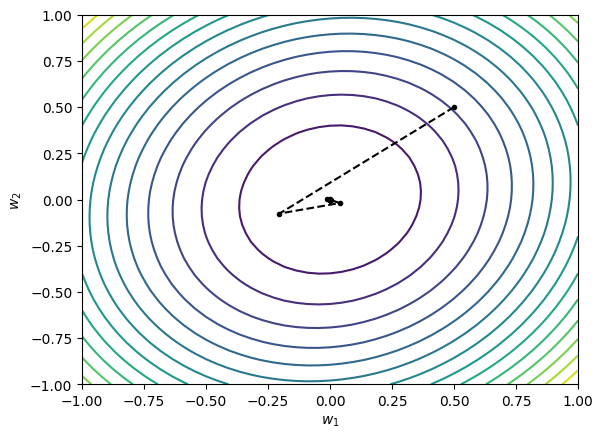

In [8]:
x0 = 0.5 * np.ones(2)

A = np.array([[30., 15],[-20, 25]])/20

f = lambda x: x.T@A@x + 1
g = lambda x: (A+A.T)@x

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)
contour_map(f)
plt.plot(xs[:,0], xs[:,1], '.--k')
plt.show()


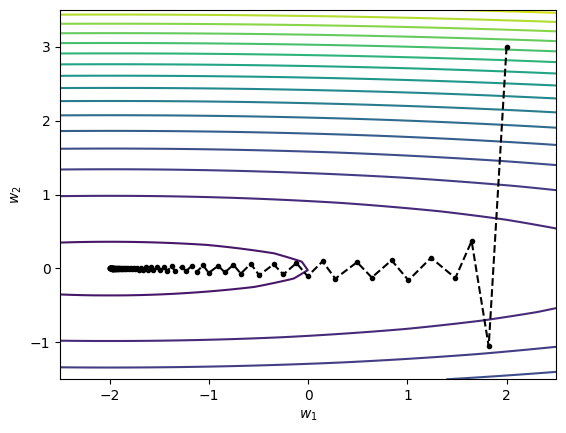

In [9]:
x0 = np.array([2.,3.])

f = lambda x: (x[0]**2 + 30 * x[1]**2 + 4 * x[0])
g = lambda x: np.array([2 * x[0] + 4, 60 * x[1]])

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)
contour_map(f, xb=(-2.5,2.5), yb=(-1.5,3.5))
plt.plot(xs[:,0], xs[:,1], '.--k')
plt.show()

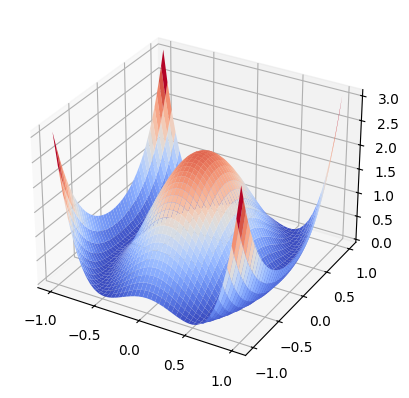

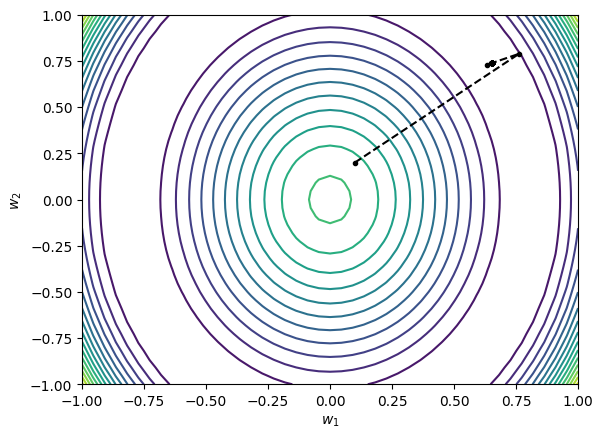

In [10]:
x0 = np.array([.1, .2])
b = np.array([1.5,1.])
f = lambda x: (np.linalg.norm(x * b)**2 - 1.5)**2
g = lambda x: 4 * (np.linalg.norm(x*b)**2 - 1.5) * x * b*b

surface_plot(f)
plt.show()

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)
contour_map(f)
plt.plot(xs[:,0], xs[:,1], '.--k')
plt.show()

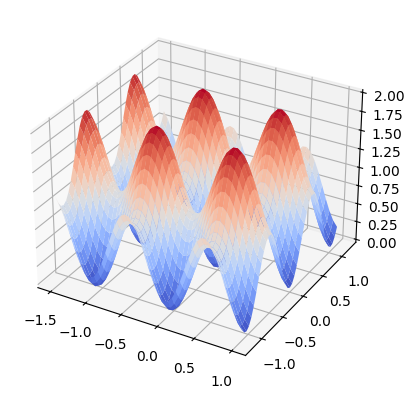

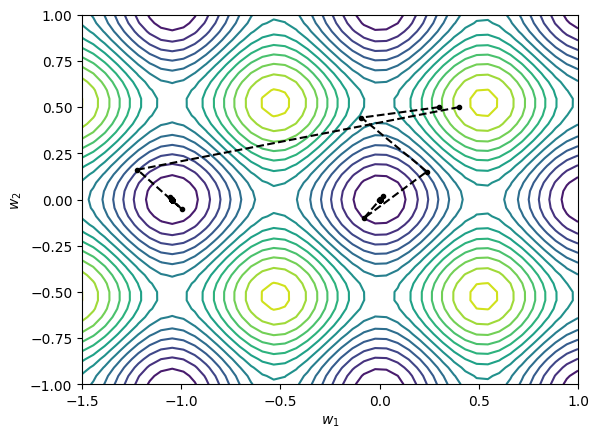

In [11]:
x0 = np.array([.3,.5])

f = lambda x: np.linalg.norm(np.sin(x*3))**2
g = lambda x: 6 * np.sin(x*3) * np.cos(x*3)

surface_plot(f, xb=(-1.5, 1.), yb=(-1.2,1.2))
plt.show()

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)
contour_map(f, xb=(-1.5, 1.), yb=(-1.,1.))
plt.plot(xs[:,0], xs[:,1], '.--k')

x0 = np.array([.4,.5])
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)
plt.plot(xs[:,0], xs[:,1], '.--k')
plt.show()


## Task 4: Linear regression


### 2D linear regression

Finish the gradient `g` of the linear regression loss.

Additionaly to the contour map, plot the gradient and loss function over iterations.

In [12]:
from sklearn.datasets import make_regression

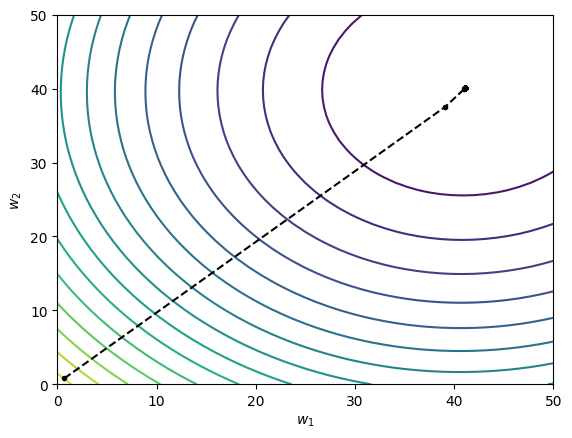

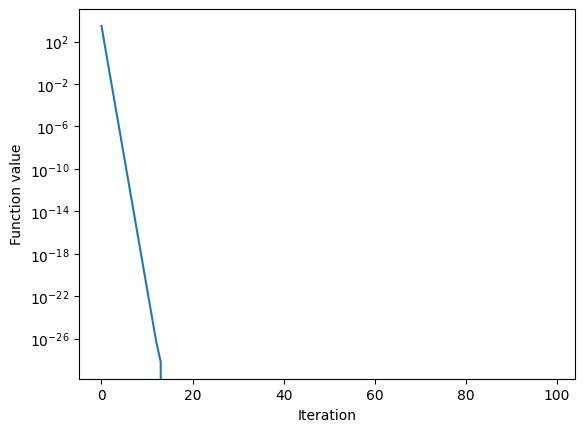

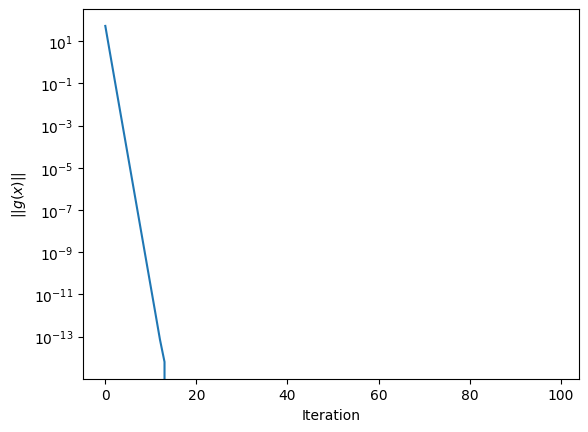

In [13]:
X, y = make_regression(n_samples=1000, n_features=2, n_informative=2, random_state=0)

def f(w):
    return np.linalg.norm(X @ w - y) ** 2 / len(X)

def g(w):
    return X.T @ (X @ w - y) / X.shape[0]

x0 = np.array([.7, .8])
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

contour_map(f,xb=(0,50), yb=(0,50))
plt.plot(xs[:,0], xs[:,1], '.--k')
plt.show()

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('$||g(x)||$')
plt.show()

### High-dimensional linear regression

Plot the function value and norm of gradient for this high-dimensional dataset.

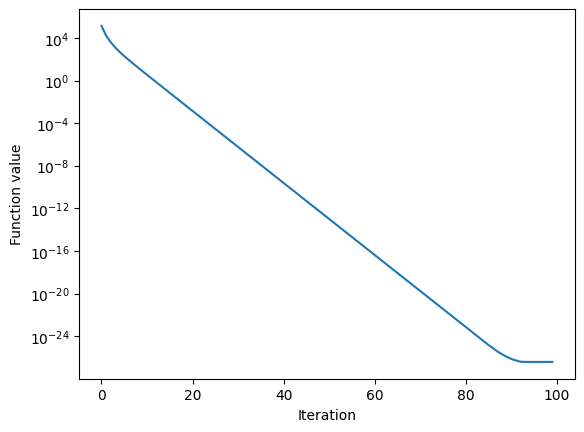

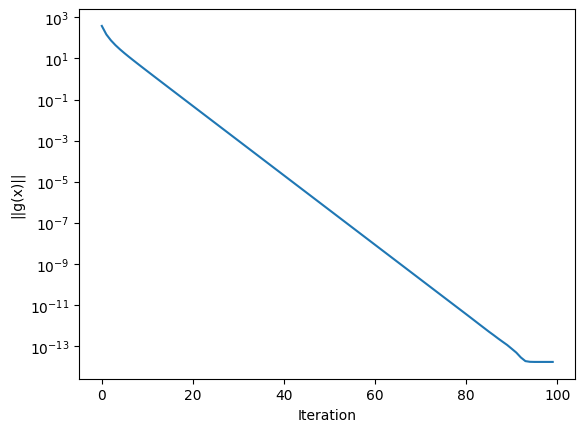

In [14]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)

x0 = np.zeros(100)
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('||g(x)||')
plt.show()

## Task 5: Logistic regression



### 2D logistic regression

Finish the gradient `g` of the logistic regression loss.

Additionaly to the given contour map, plot the gradient and loss function over iterations.

In [15]:
from sklearn.datasets import make_classification

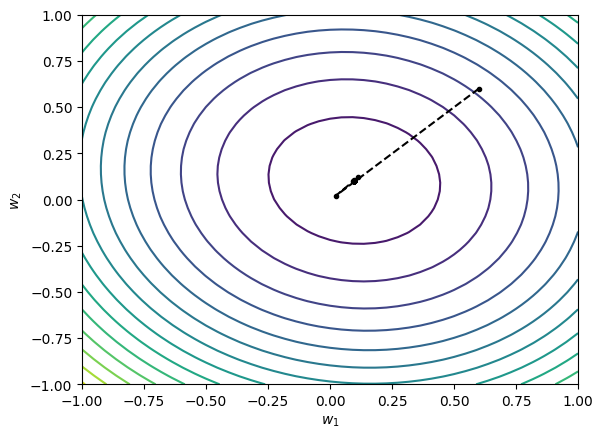

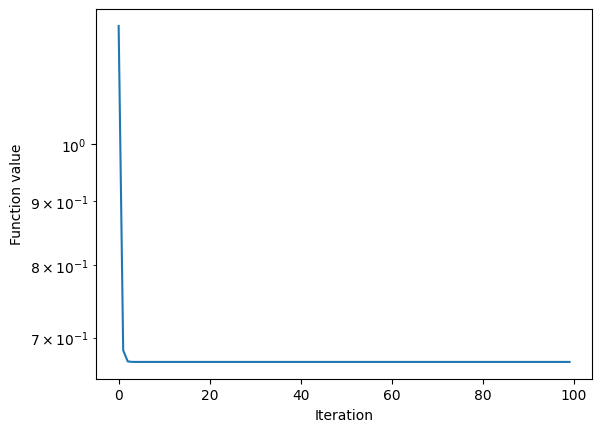

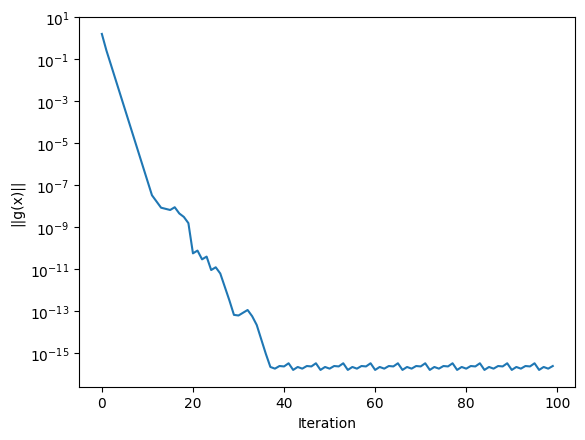

In [16]:
X, y = make_classification(1000, 2, n_informative=2,
                               n_redundant=0,
                               n_clusters_per_class=1, flip_y=0.1, random_state=0)

def f(w):
    return np.log(1. + np.exp(-y * X.dot(w))).mean() + np.linalg.norm(w)**2

def g(w):
    loss_term = - (1 / X.shape[0]) * X.T @ (y / (1 + np.exp(y * X.dot(w)))) 
    return loss_term + 2 * w

x0 = np.array([.6, .6])
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

contour_map(f)
plt.plot(xs[:,0], xs[:,1], '.--k')
plt.show()

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('||g(x)||')
plt.show()

### High-dimensional logistic regression

Plot the function value and norm of gradient for this high-dimensional dataset.


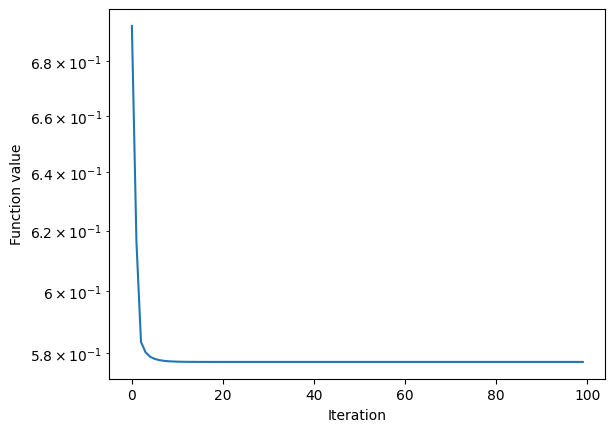

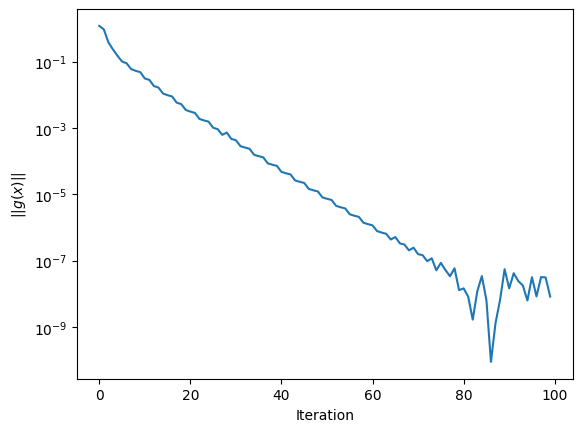

In [17]:
X, y = make_classification(1000, 80, n_informative=40,
#                               n_redundant=0,
                               n_clusters_per_class=2, flip_y=0.1, random_state=0)

x0 = np.zeros(80)
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel('Iteration')
plt.ylabel('$||g(x)||$')
plt.show()

# Task 6: Negative gradient direction

Show that the negative gradient is in some sense the best direction, i.e., it minimizes the following optimization problem:
$$
\begin{array}{ll}
\displaystyle\min_{v\in\mathbb{R}^d} & \nabla f(x)^\top v\\
\text{st}& \|v\|_2 = 1
\end{array}
$$
Write your proof here.



### Step 1: Understanding the Objective
The objective function we want to minimize is the inner product $\nabla f(x)^\top v$, where $v$ is a unit vector $\|v\|_2 = 1$.

### Step 2: Using the Cauchy-Schwarz Inequality
The Cauchy-Schwarz inequality states that for any vectors $a, b \in \mathbb{R}^d$,
$$a^\top b \leq \|a\|_2 \|b\|_2.$$
In our case, let $a = \nabla f(x)$ and $b = v$. Then,
$$\nabla f(x)^\top v \leq \|\nabla f(x)\|_2 \|v\|_2.$$
Since $v$ is constrained to be a unit vector ($\|v\|_2 = 1$), this inequality simplifies to
$$\nabla f(x)^\top v \leq \|\nabla f(x)\|_2.$$

### Step 3: Achieving the Minimum
Equality in the Cauchy-Schwarz inequality holds if and only if $v$ is in the same or opposite direction as $\nabla f(x) $. To minimize $\nabla f(x)^\top v $, we should choose $v$ in the opposite direction of $\nabla f(x)$, since we are looking for the smallest possible value.

Thus, set $$ v = -\frac{\nabla f(x)}{\|\nabla f(x)\|_2}. $$
Then,
$$\nabla f(x)^\top v = \nabla f(x)^\top \left(-\frac{\nabla f(x)}{\|\nabla f(x)\|_2}\right) = -\|\nabla f(x)\|_2.$$

### Conclusion
The minimum value of $\nabla f(x)^\top v$ subject to $\|v\|_2 = 1$ is $ -\|\nabla f(x)\|_2 $, and this is achieved by setting $ v = -\frac{\nabla f(x)}{\|\nabla f(x)\|_2} $, i.e., in the direction of the negative gradient.

Thus, the negative gradient direction $ -\nabla f(x)$ is indeed the "best direction" in the sense that it minimizes the inner product $\nabla f(x)^\top v$ under the unit norm constraint on $v$.